In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
dataset=pd.read_csv('../datasets/weight-height.csv')
dataset.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
MaleData=dataset[dataset['Gender']=='Male']

MaleData.head()




,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


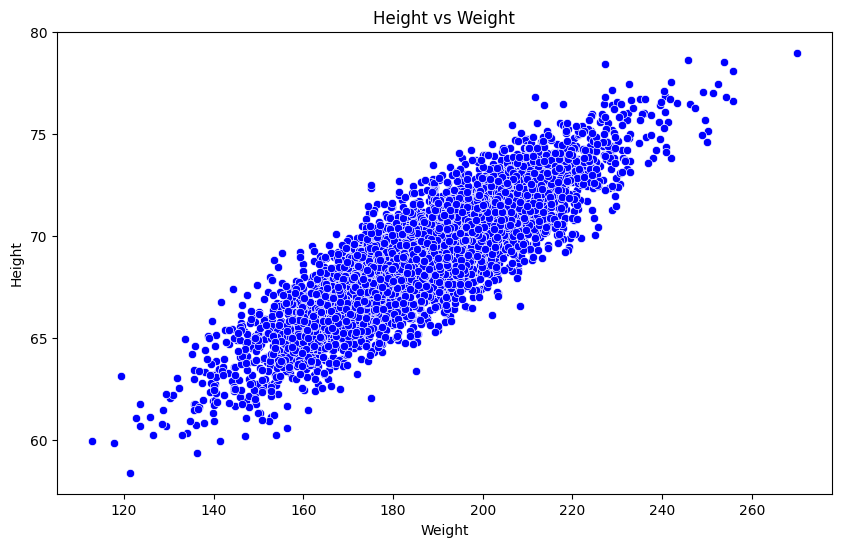

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight',y='Height',data=MaleData,color='blue') 
plt.title('Height vs Weight')
plt.show()

In [5]:
# Devide Data into Dependent and Independent Variables

X=MaleData[['Weight']] # Independent Variable
y=MaleData[['Height']] # Dependent Variable

# Split Data into Training and Testing Data
X.shape,y.shape


((5000, 1), (5000, 1))

In [6]:
## Split Data into Training and Testing Data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)





In [7]:
# STANDRIAD SCALER
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



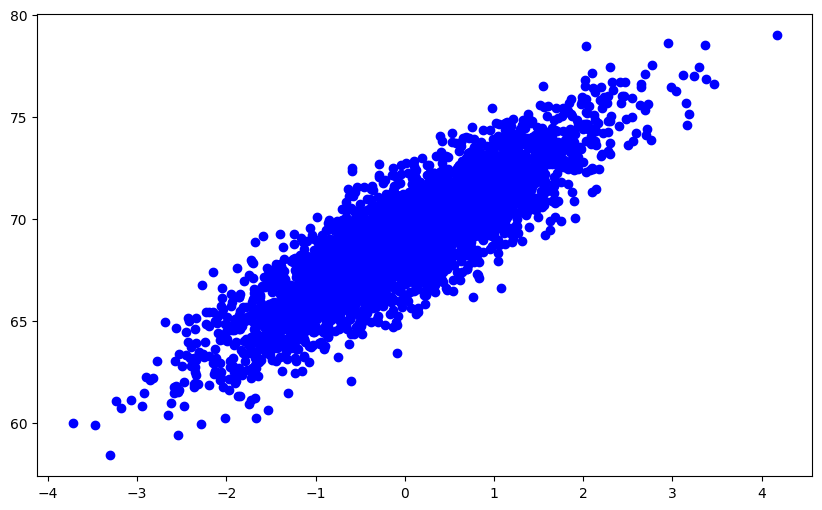

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,color='blue')
plt.show()

In [9]:
## Tranining the Model

from sklearn.linear_model import LinearRegression

manmodel=LinearRegression()
manmodel.fit(X_train,y_train)


LinearRegression()

In [10]:
manmodel.coef_,manmodel.intercept_

(array([[2.48688167]]), array([69.01790695]))

In [11]:
print('Coefficient:',manmodel.coef_)
print('Intercept:',manmodel.intercept_)

Coefficient: [[2.48688167]]
Intercept: [69.01790695]


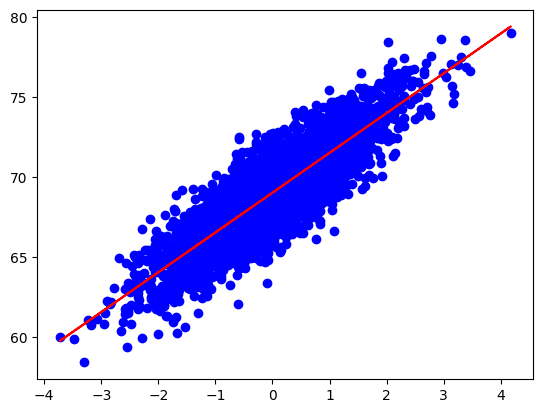

In [12]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,manmodel.predict(X_train),color='red')

In [13]:
y_pred_test=manmodel.predict(X_test)
y_pred_test,y


(array([[72.09138437],
        [68.02236912],
        [67.91868978],
        ...,
        [69.83743309],
        [67.76347621],
        [67.62375741]]),
          Height
 0     73.847017
 1     68.781904
 2     74.110105
 3     71.730978
 4     69.881796
 ...         ...
 4995  68.860062
 4996  68.973423
 4997  67.013795
 4998  71.557718
 4999  70.351880
 
 [5000 rows x 1 columns])

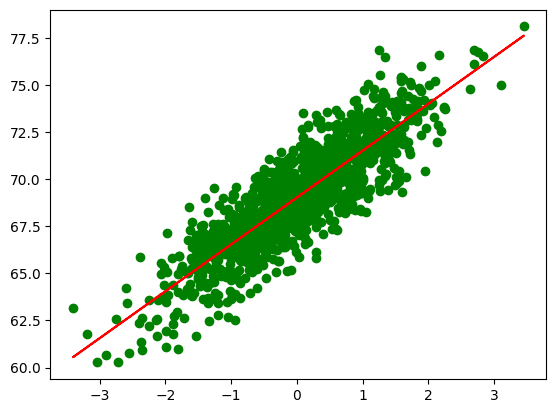

In [14]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,manmodel.predict(X_test),color='red')

In [15]:
#Performance Metrics

## Mean Squared Error
## Mean Absolute Error
## RMSE
## R2 Score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('Mean Squared Error:',mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))

Mean Squared Error: 2.0312205748118313
Mean Absolute Error: 1.1415392187397901
Root Mean Squared Error: 1.4252089582976355


In [16]:
from sklearn.metrics import r2_score
print('R2 Score:',r2_score(y_test,y_pred_test))



R2 Score: 0.7427361627635578


In [21]:
manmodel.predict([[72]])

array([[248.07338713]])

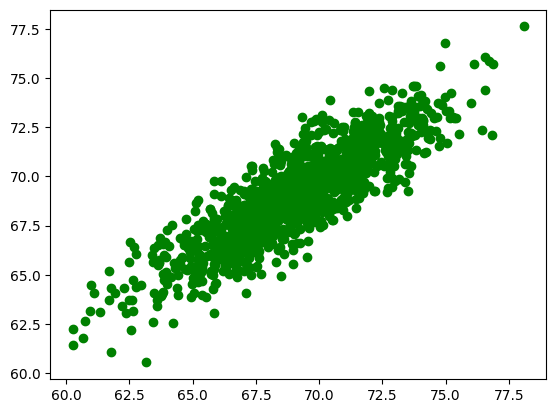

In [22]:
## SCatetr prediction

plt.scatter(y_test,y_pred_test,color='green')



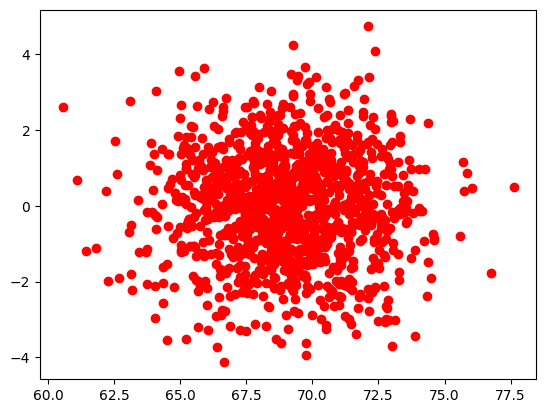

In [23]:
## Residuals
residuals=y_test-y_pred_test
plt.scatter(y_pred_test,residuals,color='red')

<Axes: ylabel='Count'>

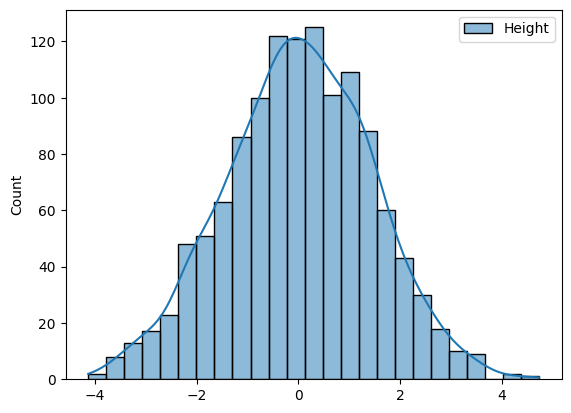

In [26]:
sns.histplot(residuals,kde=True,color='blue')

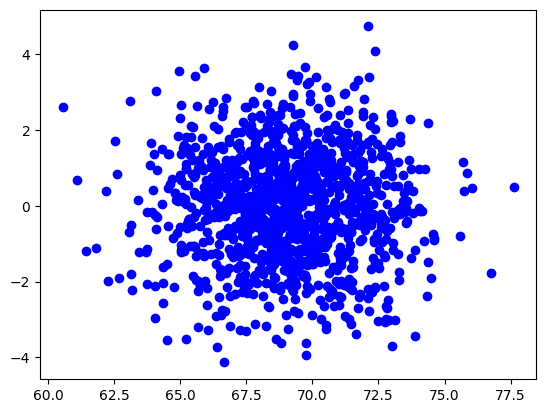

In [29]:
plt.scatter(y_pred_test,residuals,color='blue')

In [30]:
## pickling the model

import pickle


pickle.dump(manmodel,open('../Model/manmodel.pkl','wb'))
